In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<function matplotlib.pyplot.show(close=None, block=None)>

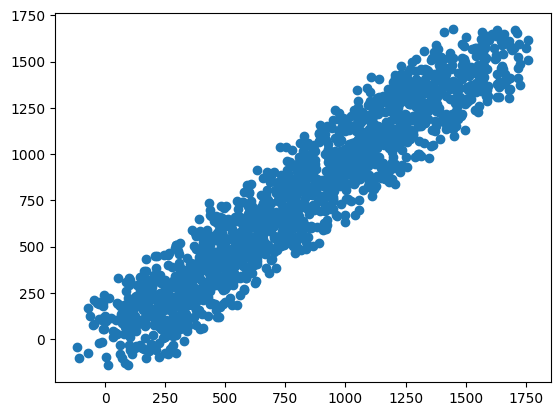

In [2]:
df = pd.read_csv('datosmasas.csv')
x = df['x']
y = df['y']
plt.scatter(x,y)
plt.show

In [3]:
#Tensor de orden cero
t0 = sum(df['masas'])
print(t0)

4627.0


821.9739073711677


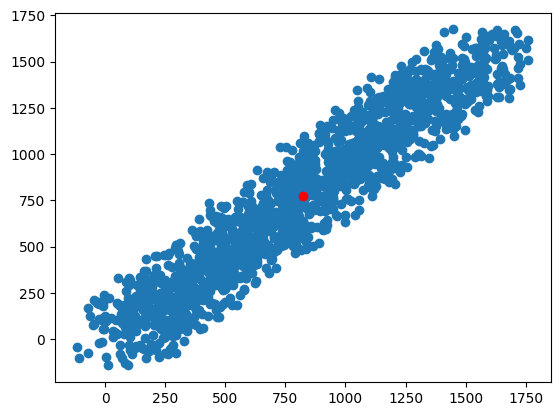

In [4]:
#Vector de media
xmedia = sum(x)/len(x)
ymedia =sum(y)/len(y)
print(xmedia)

plt.scatter(x,y)
plt.plot(xmedia,ymedia, 'ro')
plt.show()

In [5]:
#Tensor de orden uno
vector_media = [xmedia,ymedia]
tensor1x = 0
tensor1y = 0
for i in range(len(x)):
    tensor1x += df['masas'][i] * (df['x'][i] - xmedia)
    tensor1y += df['masas'][i] * (df['y'][i] - ymedia)

tensor1 = [tensor1x,tensor1y]
print('El tensor de orden uno es: ')
print(tensor1)


El tensor de orden uno es: 
[17773.73059360568, 4850.634703204753]


In [6]:
#Tensor de orden dos
masas = df['masas'].values
xvec = df['x'].values
yvec = df['y'].values

a = np.ones(len(x))
b = np.ones(len(x))
c = np.ones(len(x))
masasvec = masas * a
xmediavec = xmedia * b
ymediavec = ymedia * c


xx = ((xvec - xmedia)*(xvec - xmedia))*masasvec
xx = sum(xx)
xy = ((xvec - xmedia)*(yvec - ymedia))*masasvec
xy = sum(xy)
yx = xy
yy = ((yvec - ymedia)*(yvec - ymedia))*masasvec
yy = sum(yy)

tensor2 = np.array([[xx , xy],
                    [yx , yy]])

print(tensor2)

[[9.58603863e+08 9.11766544e+08]
 [9.11766544e+08 9.63665233e+08]]


Eigenvectors:
[[-0.70808741 -0.70612479]
 [ 0.70612479 -0.70808741]]
Eigenvalues:
[4.93644922e+07 1.87290460e+09]
[[9.58603863e+08 9.11766544e+08]
 [9.11766544e+08 9.63665233e+08]]


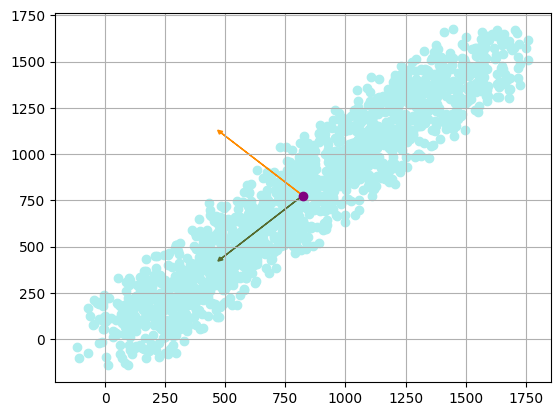

In [7]:
#Valores y vectores propios del tensor de orden 2
eigenvalues, eigenvectors = np.linalg.eig(tensor2)

print("Eigenvectors:")
print(eigenvectors)
print("Eigenvalues:")
print(eigenvalues)

b = np.diag(eigenvalues)

a = eigenvectors.dot(b).dot(np.linalg.inv(eigenvectors))
print(a)

vecprop1 = eigenvectors[:, 0]*500
vecprop2 = eigenvectors[:, 1]*500

plt.scatter(x, y, color='paleturquoise')
plt.plot(xmedia, ymedia,'o', color='purple')
'''plt.axis([xmedia-100,xmedia+100,ymedia-100,ymedia+100])'''
plt.arrow(xmedia, ymedia, vecprop1[0], vecprop1[1], head_width = 20,  head_length = 20 ,length_includes_head=True, color='darkorange')
plt.arrow(xmedia, ymedia, vecprop2[0], vecprop2[1], head_width = 20, head_length = 20 ,length_includes_head=True, color='darkolivegreen')
plt.grid()
plt.show()

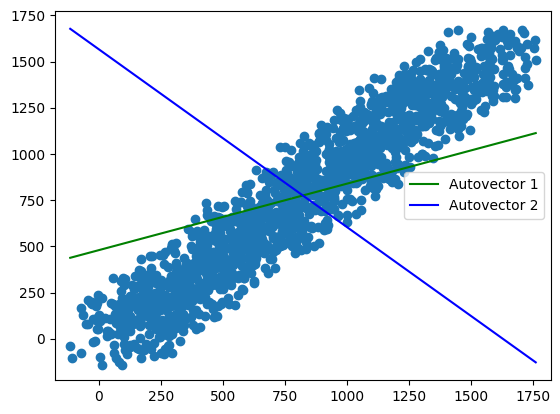

In [8]:
# Calcular las pendientes de las rectas de los autovectores
m1 = (vecprop1[1] - ymedia) / (vecprop1[0] - xmedia)
m2 = (vecprop2[1] - ymedia) / (vecprop2[0] - xmedia)

# Definir los puntos de las rectas usando las pendientes
x1 = np.linspace(min(x), max(x))
y1 = m1 * (x1 - xmedia) + ymedia
y2 = -m2 * (x1 - xmedia) + ymedia

plt.scatter(x, y)
plt.plot(x1, y1, '-g', label='Autovector 1')
plt.plot(x1, y2, '-b', label='Autovector 2')
plt.legend()
# Ampliar la gráfica
plt.xlim(xmedia - 1000, xmedia + 1000)
plt.ylim(ymedia - 1000, ymedia + 1000)


plt.show()

 1. ¿Los vectores vase del sistema cartesiano constituyen una base propia para esta distribución de masa? Esto es: ¿Los vectores cartesianos son autovectores del tensor momento de inercia?
 2. Encuentre los ejes principales de inercia para esta distribución de masas. Esto es aquellos vectores propios del tensor inercia, que forma una base ortogonal respecto a la cual la distribución de las masas se organiza de la forma más simple.
 3. Encuentre la matriz de transformación de la base cartesiana a la base de autovectores conformada por los ejes principales

##### *Considere el caso 3D*

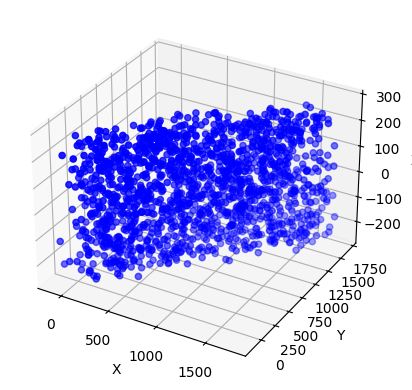

In [9]:
df = pd.read_csv('datosmasas.csv')
x = df['x']
y = df['y']
z = df['z']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [10]:
#Tensor de orden cero
t0 = sum(df['masas'])
print(t0)

4627.0


Text(0.5, 0, 'Z')

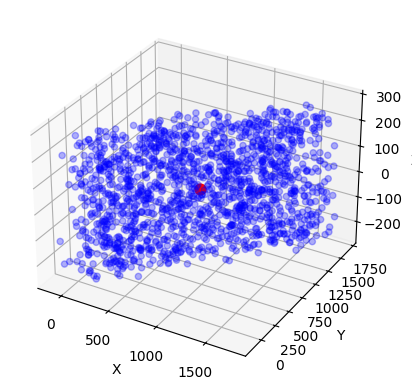

In [11]:
#Vector de media
xmedia = sum(x)/len(x)
ymedia =sum(y)/len(y)
zmedia = sum(z)/len(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o', alpha=0.3)
ax.scatter(xmedia,ymedia,zmedia, c='r', s=60, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [12]:
#Tensor de orden uno
vector_media = [xmedia,ymedia,zmedia]
tensor1x = 0
tensor1y = 0
tensor1z = 0
for i in range(len(x)):
    tensor1x += df['masas'][i] * (df['x'][i] - xmedia)
    tensor1y += df['masas'][i] * (df['y'][i] - ymedia)
    tensor1z += df['masas'][i] * (df['z'][i] - zmedia)

tensor1 = [tensor1x,tensor1y,tensor1z]
print('El tensor de orden uno es: ')
print(tensor1)

El tensor de orden uno es: 
[17773.73059360568, 4850.634703204753, 2036.2283105021615]


In [13]:
#tensor segundo grado 
masas = df['masas'].values
xvec = df['x'].values
yvec = df['y'].values
zvec = df['z'].values

a = np.ones(len(x))
b = np.ones(len(x))
c = np.ones(len(y))
d = np.ones(len(z))
masasvec = masas * a
xmediavec = xmedia * b
ymediavec = ymedia * c
zmediavec = zmedia * d

xx = ((xvec - xmedia)*(xvec - xmedia))*masasvec
xy = ((xvec - xmedia)*(yvec - ymedia))*masasvec
xz = ((xvec - xmedia)*(zvec - zmedia))*masasvec
yy = ((yvec - ymedia)*(yvec - ymedia))*masasvec
yz = ((yvec - ymedia)*(zvec - zmedia))*masasvec
zz = ((zvec - zmedia)*(zvec - zmedia))*masasvec
xx = sum(xx)
xy = sum(xy)
xz = sum(xz)
yy = sum(yy)
yz = sum(yz)
zz = sum(zz)


tensor2 = np.array([[xx, xy, xz],
                    [xy, yy, yz],
                    [xz, yz, zz]])

print(tensor2)

[[ 9.58603863e+08  9.11766544e+08 -7.13422686e+06]
 [ 9.11766544e+08  9.63665233e+08 -1.92746259e+06]
 [-7.13422686e+06 -1.92746259e+06  1.01844217e+08]]


Eigenvectors:
[[ 0.70612535  0.70653155 -0.04690577]
 [ 0.70807762 -0.70422699  0.05186931]
 [-0.00361499  0.06983916  0.99755171]]
Eigenvalues:
[1.87292775e+09 4.91061110e+07 1.02079453e+08]
[[ 9.58603863e+08  9.11766544e+08 -7.13422686e+06]
 [ 9.11766544e+08  9.63665233e+08 -1.92746259e+06]
 [-7.13422686e+06 -1.92746259e+06  1.01844217e+08]]


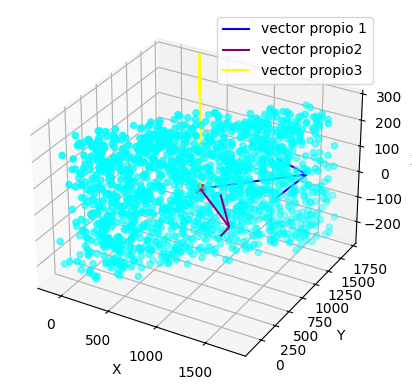

In [14]:
#Valores y vectores propios del tensor de orden 2
eigenvalues, eigenvectors = np.linalg.eig(tensor2)

print("Eigenvectors:")
print(eigenvectors)
print("Eigenvalues:")
print(eigenvalues)

b = np.diag(eigenvalues)

a = eigenvectors.dot(b).dot(np.linalg.inv(eigenvectors))
print(a)

vecprop1 = eigenvectors[:, 0]*1000
vecprop2 = eigenvectors[:, 1]*1000
vecprop3 = eigenvectors[:, 2]*500

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos
ax.scatter(x, y, z, color='cyan')

# Graficar el punto medio
ax.scatter(xmedia, ymedia, zmedia, c='r', s=60, alpha=1)

# Graficar los vectores propios
ax.quiver(xmedia, ymedia, zmedia, vecprop1[0], vecprop1[1], vecprop1[2], color='blue', label='vector propio 1')
ax.quiver(xmedia, ymedia, zmedia, vecprop2[0], vecprop2[1], vecprop2[2], color='purple', label='vector propio2')
ax.quiver(xmedia, ymedia, zmedia, vecprop3[0], vecprop3[1], vecprop3[2], color='yellow', label='vector propio3')

# Establecer etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

'''# Establecer los límites de los ejes
ax.set_xlim([xmedia - 100, xmedia + 100])
ax.set_ylim([ymedia - 100, ymedia + 100])
ax.set_zlim([zmedia - 100, zmedia + 100])'''


# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

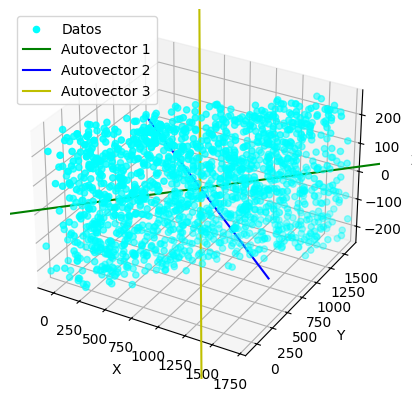

In [15]:
# Calcular puntos en las rectas en 3D
alpha = np.linspace(-2, 2, 100)

x1 = xmedia + alpha * vecprop1[0]
y1 = ymedia + alpha * vecprop1[1]
z1 = zmedia + alpha * vecprop1[2]

x2 = xmedia + alpha * vecprop2[0]
y2 = ymedia + alpha * vecprop2[1]
z2 = zmedia + alpha * vecprop2[2]

x3 = xmedia + alpha * vecprop3[0]
y3 = ymedia + alpha * vecprop3[1]
z3 = zmedia + alpha * vecprop3[2]

# Graficar los puntos de datos y las rectas en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos
ax.scatter(x, y, z, color='cyan', label='Datos')

# Graficar las rectas en 3D
ax.plot(x1, y1, z1, '-g', label='Autovector 1')
ax.plot(x2, y2, z2, '-b', label='Autovector 2')
ax.plot(x3, y3, z3, '-y', label='Autovector 3')

# Establecer límites de los ejes para hacer zoom
ax.set_xlim([np.min(x), np.max(x)])
ax.set_ylim([np.min(y), np.max(y)])
ax.set_zlim([np.min(z), np.max(z)])

# Establecer etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()



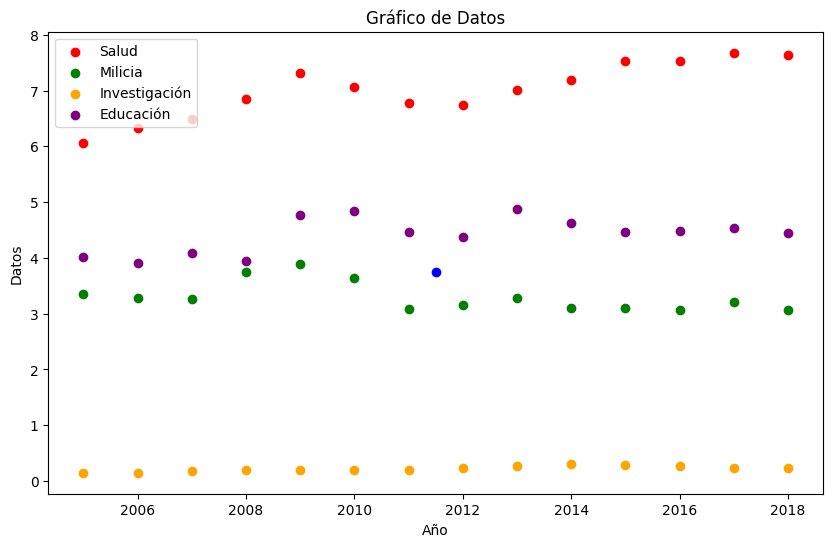

In [16]:
df = pd.read_csv('GDP.csv')
# Continue with your code...
año = df['año']
datos_milicia = df['military']
datos_educacion = df['education']
datos_investigacion  = df['Research and development']
datos_salud = df['health']

# Calculate the average year
año_media = año.sum() / len(año)

# Calculate the average of all data columns
datos_media = (datos_milicia.sum() + datos_educacion.sum() + datos_investigacion.sum() + datos_salud.sum()) / (len(df)*4)

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos
plt.scatter(año,datos_salud,  color='red', label='Salud')
plt.scatter(año,datos_milicia,  color='green', label='Milicia')
plt.scatter(año,datos_investigacion,  color='orange', label='Investigación')
plt.scatter(año,datos_educacion,  color='purple', label='Educación')
plt.plot(año_media,datos_media, 'bo')
# Añadir etiquetas y leyenda
plt.xlabel('Año')
plt.ylabel('Datos')
plt.title('Gráfico de Datos')
plt.legend()

# Mostrar la gráfica
plt.show()

In [17]:

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Calcular matriz de covarianza
cov_matrix = np.cov(df.iloc[:, 1:].T)

print("Matriz de Covarianza:")
print(cov_matrix)

Matriz de Covarianza:
[[ 0.07080719  0.00336502 -0.0060004  -0.02062215]
 [ 0.00336502  0.10266491  0.00881465  0.09987053]
 [-0.0060004   0.00881465  0.00234834  0.0173096 ]
 [-0.02062215  0.09987053  0.0173096   0.25136148]]


In [18]:
# Calcular matriz de correlación
corr_matrix = df.corr()

# Imprimir solo los valores numéricos
print(corr_matrix.to_numpy())

[[ 1.         -0.54017818  0.5435964   0.81216561  0.88986418]
 [-0.54017818  1.          0.03946734 -0.46532986 -0.15457738]
 [ 0.5435964   0.03946734  1.          0.56769271  0.6216944 ]
 [ 0.81216561 -0.46532986  0.56769271  1.          0.712454  ]
 [ 0.88986418 -0.15457738  0.6216944   0.712454    1.        ]]


matriz de covarianza
[[ 0.07080719  0.00336502 -0.0060004  -0.02062215]
 [ 0.00336502  0.10266491  0.00881465  0.09987053]
 [-0.0060004   0.00881465  0.00234834  0.0173096 ]
 [-0.02062215  0.09987053  0.0173096   0.25136148]]
matriz correlacion
[[ 1.          0.03946734 -0.46532986 -0.15457738]
 [ 0.03946734  1.          0.56769271  0.6216944 ]
 [-0.46532986  0.56769271  1.          0.712454  ]
 [-0.15457738  0.6216944   0.712454    1.        ]]
Autovalores:
[0.30405767 0.07616071 0.04623734 0.00072621]

Autovectores:
[[ 0.07405105  0.88442429  0.45476716  0.07414139]
 [-0.44340334  0.4413451  -0.7788617  -0.04452463]
 [-0.06553676 -0.05255943 -0.0493674   0.99524133]
 [-0.89085063 -0.14228734  0.4290969  -0.04489223]]


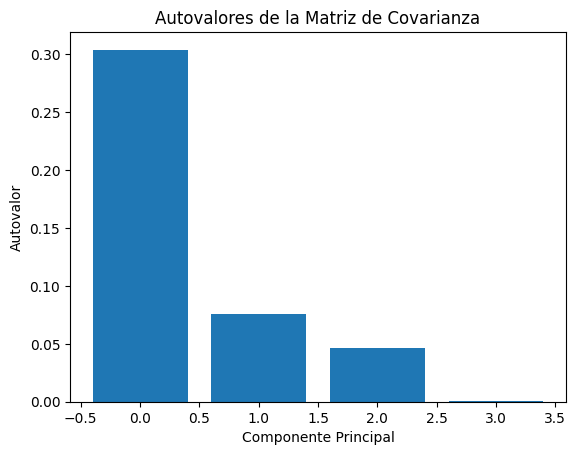

In [19]:

# Extraer las columnas necesarias
año = df['año']
datos_milicia = df['military']
datos_educacion = df['education']
datos_investigacion = df['Research and development']
datos_salud = df['health']

# Crear un nuevo DataFrame con las variables de interés
data = pd.DataFrame({'año': año, 'Milicia': datos_milicia, 'Educación': datos_educacion,
                     'Investigación y Desarrollo': datos_investigacion, 'Salud': datos_salud})

# Calcular la matriz de covarianza y la matriz de correlación
cov_matrix = data[['Milicia', 'Educación', 'Investigación y Desarrollo', 'Salud']].cov()
correlation_matrix = data[['Milicia', 'Educación', 'Investigación y Desarrollo', 'Salud']].corr()
print('matriz de covarianza')
print(cov_matrix.values)
print('matriz correlacion')
print(correlation_matrix.values)
# Calcular los autovalores y autovectores de la matriz de covarianza
cov_eigenvalues, cov_eigenvectors = np.linalg.eig(cov_matrix)

# Imprimir los autovalores y autovectores
print("Autovalores:")
print(cov_eigenvalues)
print("\nAutovectores:")
print(cov_eigenvectors)

# Graficar los autovalores
plt.bar(range(len(cov_eigenvalues)), cov_eigenvalues)
plt.title('Autovalores de la Matriz de Covarianza')
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.show()



In [20]:
df = pd.read_csv('GDP.csv')
# Extraer las columnas necesarias
año = df['año'].values
datos_milicia = df['military'].values
datos_educacion = df['education'].values
datos_investigacion = df['Research and development'].values
datos_salud = df['health'].values
m_media= datos_milicia.sum()/len(año)
e_media= datos_educacion.sum()/len(año)
c_media= datos_investigacion.sum()/len(año)
s_media= datos_salud.sum()/len(año)


mm = ((datos_milicia - m_media)*(datos_milicia - m_media))
mm = sum(mm)/(len(año)-1)
me = ((datos_milicia - m_media)*(datos_educacion - e_media))
me = sum(me)/(len(año)-1)
mc = ((datos_milicia - m_media)*(datos_investigacion - c_media))
mc = sum(mc)/(len(año)-1)
ms = ((datos_milicia - m_media)*(datos_salud - s_media))
ms = sum(ms)/(len(año)-1)
ee = ((datos_educacion - e_media)*(datos_educacion - e_media))
ee = sum(ee)/(len(año)-1)
ec = ((datos_educacion - e_media)*(datos_investigacion - c_media))
ec = sum(ec)/(len(año)-1)
es = ((datos_educacion - e_media)*(datos_salud - s_media))
es = sum(es)/(len(año)-1)
cc = ((datos_investigacion - c_media)*(datos_investigacion - c_media))
cc = sum(cc)/(len(año)-1)
cs= ((datos_investigacion - c_media)*(datos_salud - s_media))
cs = sum(cs)/(len(año)-1)
ss = ((datos_salud - s_media)*(datos_salud - s_media))
ss = sum(ss)/(len(año)-1)


cov_matrix = np.array([[mm , me , mc , ms ],
                       [me , ee , ec , es ],
                       [mc , ec , cc , cs ],
                       [ms , es , cs , ss ]])

print('la matriz de covarianza es:')
print(cov_matrix)


la matriz de covarianza es:
[[ 0.07080719  0.00336502 -0.0060004  -0.02062215]
 [ 0.00336502  0.10266491  0.00881465  0.09987053]
 [-0.0060004   0.00881465  0.00234834  0.0173096 ]
 [-0.02062215  0.09987053  0.0173096   0.25136148]]


In [21]:
std_milicia = datos_milicia.std()
std_educacion = datos_educacion.std()
std_investigacion = datos_investigacion.std()
std_salud = datos_salud.std()

correlation_matrix = np.array([[mm / (std_milicia * std_milicia),
                                       me / (std_milicia * std_educacion),
                                       mc / (std_milicia * std_investigacion),
                                       ms / (std_milicia * std_salud)],
                                      [me / (std_milicia * std_educacion),
                                       ee / (std_educacion * std_educacion),
                                       ec / (std_educacion * std_investigacion),
                                       es / (std_educacion * std_salud)],
                                      [mc / (std_milicia * std_investigacion),
                                       ec / (std_educacion * std_investigacion),
                                       cc / (std_investigacion * std_investigacion),
                                       cs / (std_investigacion * std_salud)],
                                      [ms / (std_milicia * std_salud),
                                       es / (std_educacion * std_salud),
                                       cs / (std_investigacion * std_salud),
                                       ss / (std_salud * std_salud)]])
print(correlation_matrix)


[[ 1.07692308  0.04250329 -0.50112447 -0.16646795]
 [ 0.04250329  1.07692308  0.61136138  0.66951705]
 [-0.50112447  0.61136138  1.07692308  0.76725815]
 [-0.16646795  0.66951705  0.76725815  1.07692308]]


In [22]:
#Valores y vectores propios del tensor de orden 2
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvectors:")
print(eigenvectors)
print("Matriz de transformacion")
print(eigenvectors.T)

print("Eigenvalues:")
print(eigenvalues)


Eigenvectors:
[[ 0.07405105  0.88442429  0.45476716  0.07414139]
 [-0.44340334  0.4413451  -0.7788617  -0.04452463]
 [-0.06553676 -0.05255943 -0.0493674   0.99524133]
 [-0.89085063 -0.14228734  0.4290969  -0.04489223]]
Matriz de transformacion
[[ 0.07405105 -0.44340334 -0.06553676 -0.89085063]
 [ 0.88442429  0.4413451  -0.05255943 -0.14228734]
 [ 0.45476716 -0.7788617  -0.0493674   0.4290969 ]
 [ 0.07414139 -0.04452463  0.99524133 -0.04489223]]
Eigenvalues:
[0.30405767 0.07616071 0.04623734 0.00072621]


In [23]:
matriz_transformacion = eigenvectors.T
matriz_inversa_transformacion = np.linalg.inv(matriz_transformacion)
print(matriz_inversa_transformacion)

[[ 0.07405105  0.88442429  0.45476716  0.07414139]
 [-0.44340334  0.4413451  -0.7788617  -0.04452463]
 [-0.06553676 -0.05255943 -0.0493674   0.99524133]
 [-0.89085063 -0.14228734  0.4290969  -0.04489223]]


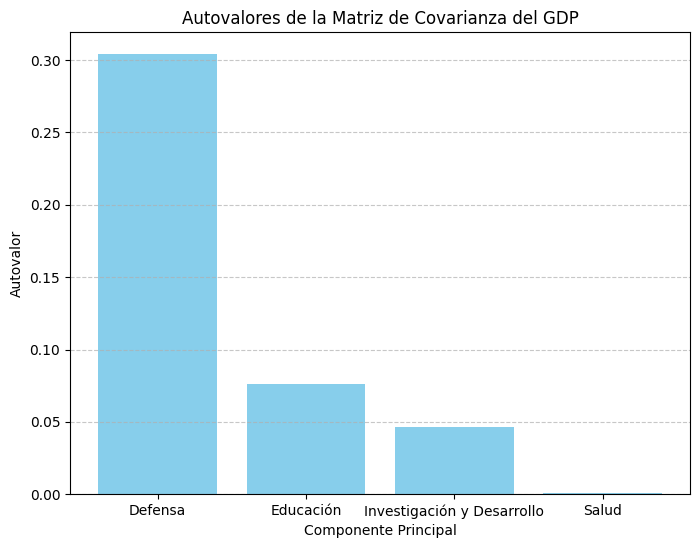

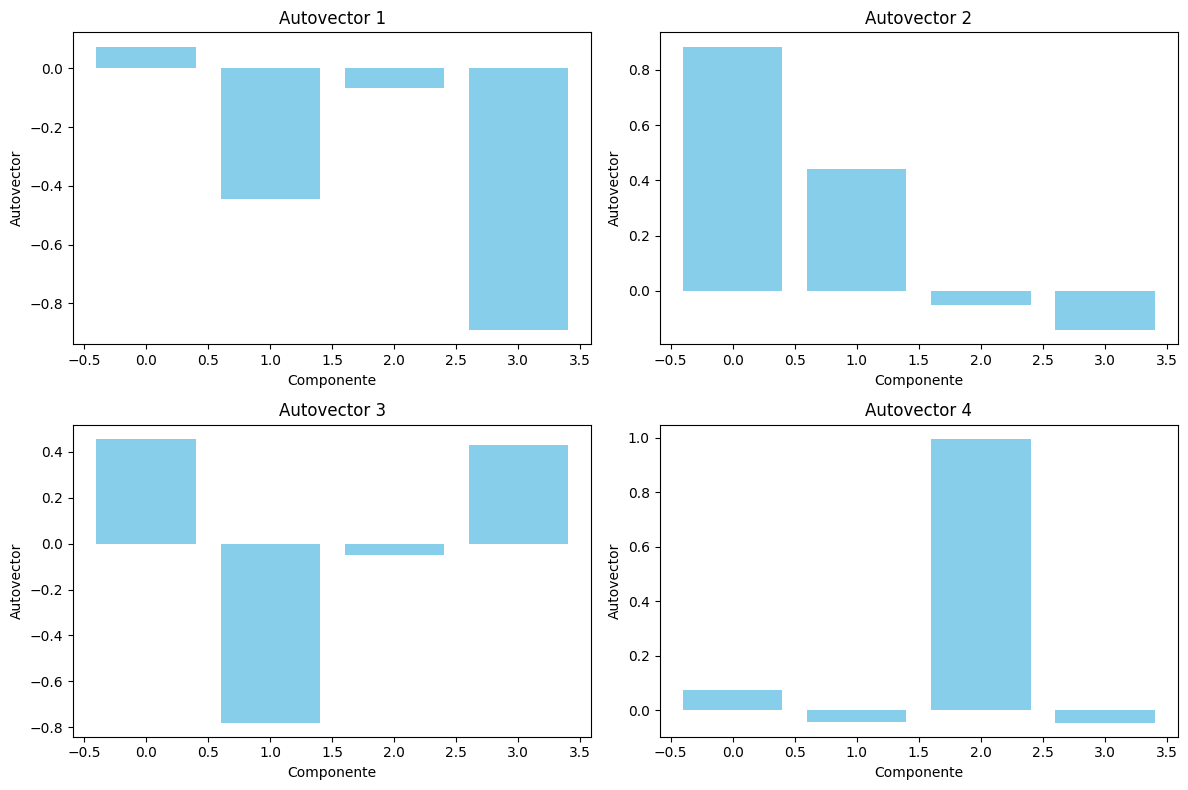

In [24]:
# Graficar los autovalores
plt.figure(figsize=(8, 6))
plt.bar(range(len(eigenvalues)), eigenvalues, color='skyblue')
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.title('Autovalores de la Matriz de Covarianza del GDP')
plt.xticks(range(len(eigenvalues)), ['Defensa', 'Educación', 'Investigación y Desarrollo', 'Salud'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Graficar los autovectores
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()
for i, eigenvectors in enumerate(eigenvectors.T):
    axs[i].bar(range(len(eigenvectors)), eigenvectors, color='skyblue')
    axs[i].set_xlabel('Componente')
    axs[i].set_ylabel('Autovector')
    axs[i].set_title(f'Autovector {i+1}')

plt.tight_layout()
plt.show()